<a href="https://colab.research.google.com/github/kshathishka/Healthinsurancepredictor/blob/main/Healthinsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Configure pandas display options (optional, adjust as needed)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load data

### Subtask:
Define and implement the `load_data` function to read the CSV file, print its shape, head, info, and describe, and return the DataFrame.


**Reasoning**:
Define the `load_data` function to read the CSV file, print its shape, head, info, and describe, and return the DataFrame as per the subtask instructions.



In [ ]:
def load_data(file_path):

  df = pd.read_csv(file_path)
  print("DataFrame shape:", df.shape)
  print("\nDataFrame head:")
  display(df.head())
  print("\nDataFrame info:")
  df.info()
  print("\nDataFrame description:")
  display(df.describe())
  return df

**Reasoning**:
Call the `load_data` function with the provided file path to execute the data loading and inspection steps and store the returned DataFrame in a variable.



In [ ]:
# Load the data
file_path = "/content/insurance.csv"
df = load_data(file_path)

DataFrame shape: (1338, 7)

DataFrame head:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

DataFrame description:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Preprocessing

### Subtask:
Define and implement the `preprocess_data` function to handle missing values, encode categorical columns, and return processed features and the target variable.


**Reasoning**:
Define the `preprocess_data` function as requested, handling missing values, encoding categorical columns, separating features and target, and printing samples.



In [ ]:
def preprocess_data(df):
  """
  Handles missing values, encodes categorical columns, and separates features and target.

  Args:
    df: The input pandas DataFrame.

  Returns:
    A tuple containing the processed features (X) and the target variable (y).
  """
  # Handle missing values (check if any exist - the dataset is known to be clean)
  if df.isnull().sum().sum() > 0:
      print("Missing values found. Handling them (no missing values expected in this dataset).")
      # In this specific dataset, there are no missing values, but in a real scenario,
      # you would add code here to handle them, e.g., df.dropna(inplace=True) or imputation.

  # Identify categorical columns
  categorical_cols = ['sex', 'smoker']

  # Use OneHotEncoder for categorical columns
  # We will use pandas get_dummies for simplicity and integration with DataFrame
  df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

  # Separate features (X) and target (y)
  X = df_processed.drop('charges', axis=1)
  y = df_processed['charges']

  # Print sample encoded data
  print("\nProcessed features (X) head:")
  display(X.head())
  print("\nTarget variable (y) head:")
  display(y.head())

  return X, y


**Reasoning**:
Call the `preprocess_data` function with the loaded DataFrame and store the returned features and target variables.



In [ ]:
# Preprocess the data
X, y = preprocess_data(df)


Processed features (X) head:


,age,bmi,children,region,sex_male,smoker_yes
0,19,27.900,0,southwest,False,True
1,18,33.770,1,southeast,True,False
2,28,33.000,3,southeast,True,False
3,33,22.705,0,northwest,True,False
4,32,28.880,0,northwest,True,False



Target variable (y) head:


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


**Reasoning**:
The previous command failed because the DataFrame `df` was not defined in the current session. This is likely due to the notebook state being reset or the previous cell where `df` was loaded not being executed in the current environment. To fix this, I need to re-execute the `load_data` function to load the data and define `df` before calling `preprocess_data`.



In [ ]:
# Load the data again as 'df' is not defined
file_path = "insurance.csv"
df = load_data(file_path)

# Preprocess the data
X, y = preprocess_data(df)

DataFrame shape: (1338, 7)

DataFrame head:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

DataFrame description:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Processed features (X) head:


,age,bmi,children,region,sex_male,smoker_yes
0,19,27.900,0,southwest,False,True
1,18,33.770,1,southeast,True,False
2,28,33.000,3,southeast,True,False
3,33,22.705,0,northwest,True,False
4,32,28.880,0,northwest,True,False



Target variable (y) head:


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


## Visualization

### Subtask:
Define and implement the `visualize_data` function to create visualizations for age, BMI, premium by gender/smoker, and a correlation heatmap.


**Reasoning**:
Define and implement the `visualize_data` function to create the requested visualizations and then call the function.



Generating visualizations...


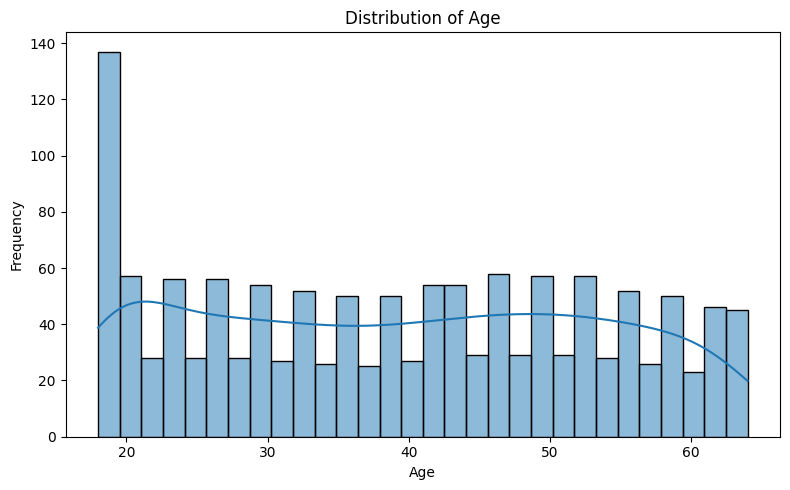

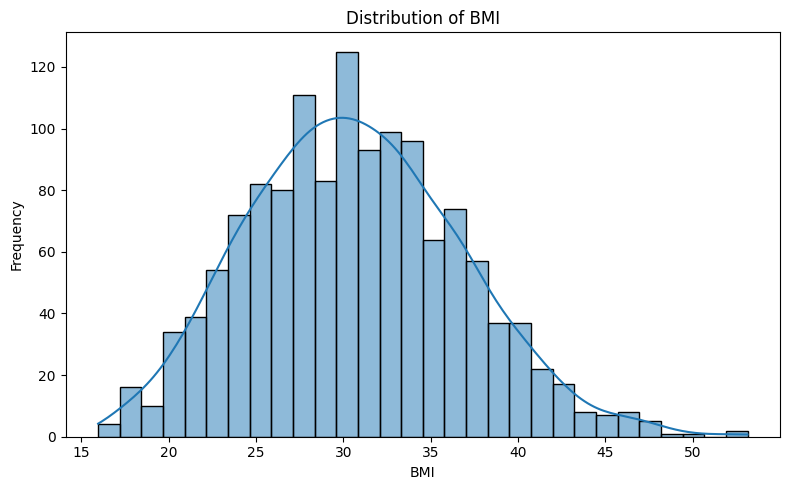

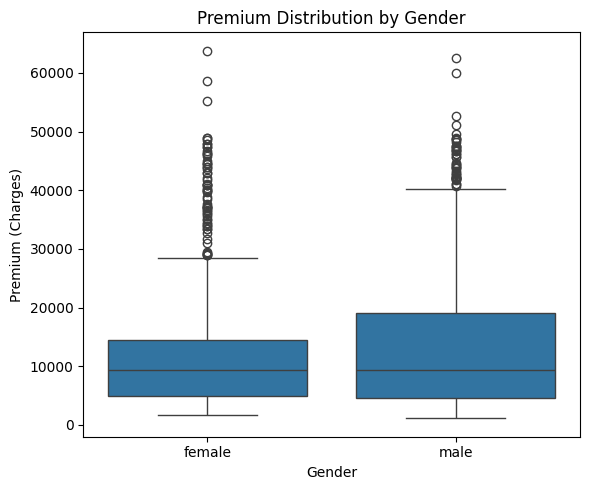

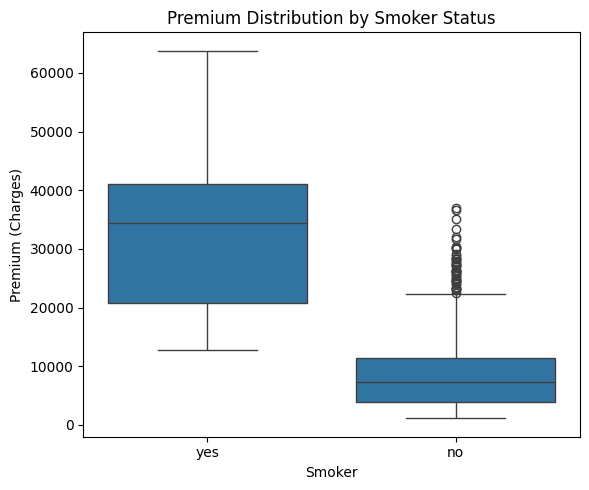

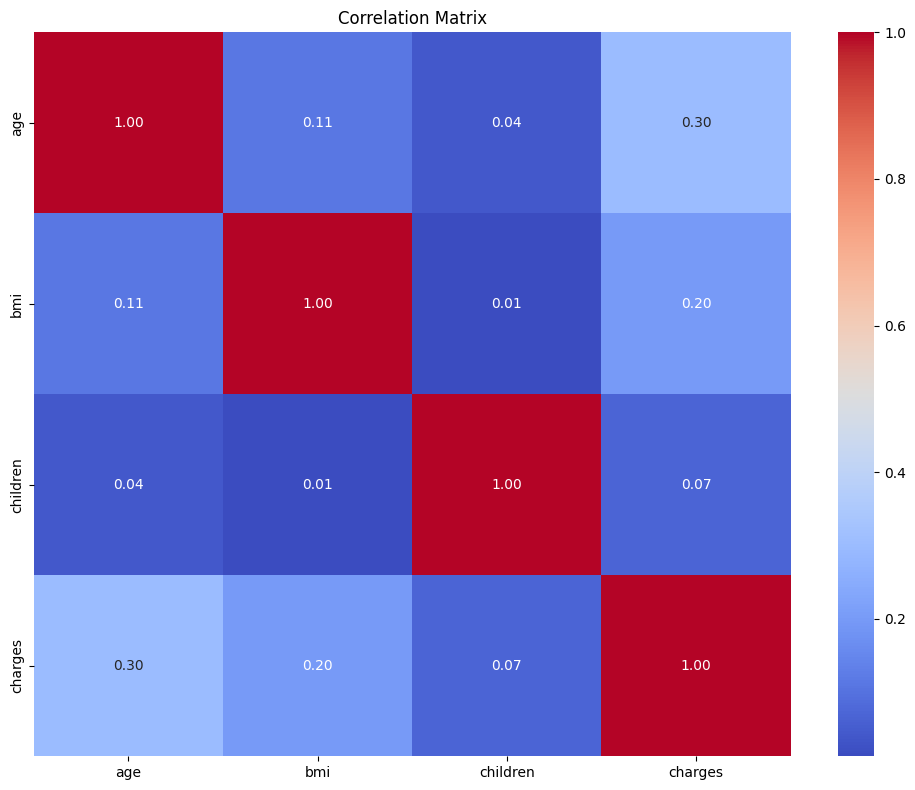

In [ ]:
# Cell 4 – Visualization
def visualize_data(df):
  """
  Creates visualizations for age, BMI, premium by gender/smoker, and correlation.

  Args:
    df: The input pandas DataFrame.
  """
  print("Generating visualizations...")

  # Histogram of age
  plt.figure(figsize=(8, 5))
  sns.histplot(df['age'], kde=True, bins=30)
  plt.title('Distribution of Age')
  plt.xlabel('Age')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()

  # Histogram of BMI
  plt.figure(figsize=(8, 5))
  sns.histplot(df['bmi'], kde=True, bins=30)
  plt.title('Distribution of BMI')
  plt.xlabel('BMI')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()

  # Boxplot of premium by gender
  plt.figure(figsize=(6, 5))
  sns.boxplot(x='sex', y='charges', data=df)
  plt.title('Premium Distribution by Gender')
  plt.xlabel('Gender')
  plt.ylabel('Premium (Charges)')
  plt.tight_layout()
  plt.show()

  # Boxplot of premium by smoker status
  plt.figure(figsize=(6, 5))
  sns.boxplot(x='smoker', y='charges', data=df)
  plt.title('Premium Distribution by Smoker Status')
  plt.xlabel('Smoker')
  plt.ylabel('Premium (Charges)')
  plt.tight_layout()
  plt.show()

  # Correlation heatmap
  # Ensure only numerical columns are included for correlation
  numerical_df = df.select_dtypes(include=np.number)
  correlation_matrix = numerical_df.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation Matrix')
  plt.tight_layout()
  plt.show()

# Call the visualize_data function
visualize_data(df)

## Split data

### Subtask:
Define and implement the `split_data` function to split the data into training and testing sets.


**Reasoning**:
Define the `split_data` function as requested, use `train_test_split` to split the data, and return the splits. Then call the function and print the shapes.



In [ ]:
# Cell 5 – Split Data
def split_data(X, y):
  """
  Splits the features and target data into training and testing sets.

  Args:
    X: The features DataFrame.
    y: The target Series.

  Returns:
    A tuple containing X_train, X_test, y_train, y_test.
  """
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

# Call the split_data function
X_train, X_test, y_train, y_test = split_data(X, y)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1070, 6)
Shape of X_test: (268, 6)
Shape of y_train: (1070,)
Shape of y_test: (268,)


## Train model

### Subtask:
Define and implement the `train_model` function to train a RandomForestRegressor model and print feature importances.


**Reasoning**:
Define and implement the `train_model` function to train a RandomForestRegressor model and print feature importances as per the instructions.



In [ ]:
# Cell 6 – Train Model
def train_model(X_train, y_train):

  print("Training the RandomForestRegressor model...")
  model = RandomForestRegressor(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)
  print("Model training complete.")

  # Get and print feature importances
  feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
  print("\nFeature Importances:")
  display(feature_importances)

  return model

# Train the model
model = train_model(X_train, y_train)

Training the RandomForestRegressor model...
Model training complete.

Feature Importances:


,0
smoker_yes,0.608618
bmi,0.216506
age,0.134232
children,0.019413
sex_male,0.006379
region_northwest,0.005587
region_southeast,0.005314
region_southwest,0.003950


**Reasoning**:
The traceback indicates that the `X_train` DataFrame still contains a string column ('region') which cannot be converted to float for model training. The preprocessing step using `pd.get_dummies` did not encode the 'region' column. I need to modify the preprocessing step to include the 'region' column in the one-hot encoding. Then, I will re-run the split data and train model steps.



In [ ]:
# Cell 3 – Preprocessing (Corrected)
def preprocess_data(df):
  """
  Handles missing values, encodes categorical columns, and separates features and target.

  Args:
    df: The input pandas DataFrame.

  Returns:
    A tuple containing the processed features (X) and the target variable (y).
  """
  # Handle missing values (check if any exist - the dataset is known to be clean)
  if df.isnull().sum().sum() > 0:
      print("Missing values found. Handling them (no missing values expected in this dataset).")
      # In this specific dataset, there are no missing values, but in a real scenario,
      # you would add code here to handle them, e.g., df.dropna(inplace=True) or imputation.

  # Identify categorical columns including 'region'
  categorical_cols = ['sex', 'smoker', 'region']

  # Use OneHotEncoder for categorical columns
  # We will use pandas get_dummies for simplicity and integration with DataFrame
  df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

  # Separate features (X) and target (y)
  X = df_processed.drop('charges', axis=1)
  y = df_processed['charges']

  # Print sample encoded data
  print("\nProcessed features (X) head:")
  display(X.head())
  print("\nTarget variable (y) head:")
  display(y.head())

  return X, y

# Load the data again as 'df' might have been modified or session reset
file_path = "insurance.csv"
df = load_data(file_path)

# Preprocess the data with the corrected function
X, y = preprocess_data(df)

# Cell 5 – Split Data (Re-run after correcting preprocessing)
def split_data(X, y):
  """
  Splits the features and target data into training and testing sets.

  Args:
    X: The features DataFrame.
    y: The target Series.

  Returns:
    A tuple containing X_train, X_test, y_train, y_test.
  """
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

# Call the split_data function
X_train, X_test, y_train, y_test = split_data(X, y)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Cell 6 – Train Model (Re-run after correcting preprocessing and splitting)
def train_model(X_train, y_train):
  """
  Trains a RandomForestRegressor model and prints feature importances.

  Args:
    X_train: The training features DataFrame.
    y_train: The training target Series.

  Returns:
    The trained RandomForestRegressor model.
  """
  print("Training the RandomForestRegressor model...")
  model = RandomForestRegressor(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)
  print("Model training complete.")

  # Get and print feature importances
  feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
  print("\nFeature Importances:")
  display(feature_importances)

  return model

# Train the model
model = train_model(X_train, y_train)

DataFrame shape: (1338, 7)

DataFrame head:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

DataFrame description:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Processed features (X) head:


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False



Target variable (y) head:


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070,)
Shape of y_test: (268,)
Training the RandomForestRegressor model...
Model training complete.

Feature Importances:


,0
smoker_yes,0.608618
bmi,0.216506
age,0.134232
children,0.019413
sex_male,0.006379
region_northwest,0.005587
region_southeast,0.005314
region_southwest,0.003950


## Evaluate model

### Subtask:
Define and implement the `evaluate_model` function to evaluate the model using MAE, RMSE, and R², and plot actual vs predicted premiums.


**Reasoning**:
Define and implement the `evaluate_model` function to evaluate the model using MAE, RMSE, and R², plot actual vs predicted premiums, and then call the function.



Evaluating the model...
Mean Absolute Error (MAE): 2550.08
Root Mean Squared Error (RMSE): 4576.30
R-squared (R²): 0.87


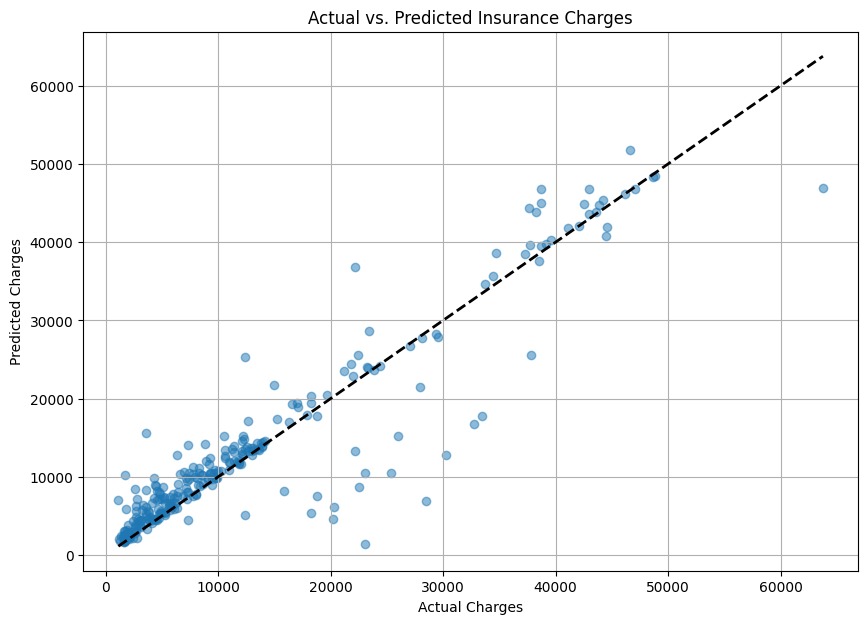

Model evaluation complete.


In [ ]:
# Cell 7 – Evaluate Model
def evaluate_model(model, X_test, y_test):
  """
  Evaluates the trained model using MAE, RMSE, and R² and plots actual vs predicted premiums.

  Args:
    model: The trained machine learning model.
    X_test: The testing features DataFrame.
    y_test: The testing target Series.
  """
  print("Evaluating the model...")

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Calculate evaluation metrics
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)

  # Print evaluation results
  print(f"Mean Absolute Error (MAE): {mae:.2f}")
  print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
  print(f"R-squared (R²): {r2:.2f}")

  # Plot actual vs predicted premiums
  plt.figure(figsize=(10, 7))
  plt.scatter(y_test, y_pred, alpha=0.5)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
  plt.xlabel("Actual Charges")
  plt.ylabel("Predicted Charges")
  plt.title("Actual vs. Predicted Insurance Charges")
  plt.grid(True)
  plt.show()
  print("Model evaluation complete.")


# Call the evaluate_model function
evaluate_model(model, X_test, y_test)

## Predict premium

### Subtask:
Define and implement the `predict_premium` function to take user input, encode it, and print the predicted premium.


**Reasoning**:
Define the predict_premium function as requested, which will take user input, encode it to match the model's expected input format, and then use the trained model to predict the insurance premium.



In [ ]:
# Cell 8 – Predict Premium
def predict_premium(model, X_train_columns, age, sex, bmi, children, smoker, region):
  """
  Takes user input, encodes it, and predicts the insurance premium using the trained model.

  Args:
    model: The trained machine learning model.
    X_train_columns: The columns of the training features DataFrame (to ensure correct order and dummy columns).
    age: User's age (int).
    sex: User's sex ('male' or 'female').
    bmi: User's BMI (float).
    children: Number of children (int).
    smoker: Smoker status ('yes' or 'no').
    region: User's region ('northeast', 'southeast', 'southwest', 'northwest').
  """
  print("\nPredicting premium for the given input...")

  # Create a dictionary from user input
  user_data = {
      'age': age,
      'sex': sex,
      'bmi': bmi,
      'children': children,
      'smoker': smoker,
      'region': region
  }

  # Create a pandas DataFrame from the user input
  user_df = pd.DataFrame([user_data])

  # Apply the same one-hot encoding as in preprocessing
  # We need to ensure all possible dummy columns are present, even if the user input doesn't have all categories
  user_df_encoded = pd.get_dummies(user_df, columns=['sex', 'smoker', 'region'], drop_first=True)

  # Reindex the user_df_encoded to match the columns of the training data (X_train)
  # This is crucial to ensure the input to the model has the same columns in the same order
  # and handles cases where the user input doesn't contain all categories present in the training data
  missing_cols = set(X_train_columns) - set(user_df_encoded.columns)
  for c in missing_cols:
      user_df_encoded[c] = 0
  user_df_encoded = user_df_encoded[X_train_columns]


  # Make the prediction
  predicted_charge = model.predict(user_df_encoded)

  # Print the predicted premium
  print(f"The predicted insurance premium is: ${predicted_charge[0]:.2f}")

# Call the predict_premium function with sample user input
# We need X_train.columns to ensure correct encoding
predict_premium(model, X_train.columns, age=30, sex='female', bmi=25.5, children=1, smoker='no', region='southwest')
predict_premium(model, X_train.columns, age=50, sex='male', bmi=35, children=2, smoker='yes', region='southeast')


Predicting premium for the given input...
The predicted insurance premium is: $4716.50

Predicting premium for the given input...
The predicted insurance premium is: $11120.43


## Summary

### Subtask:
Add a markdown cell summarizing the findings, model performance, and potential automation use cases.


**Reasoning**:
Create a markdown cell to provide a summary of the findings, model performance, and potential use cases as requested by the subtask.



In [ ]:
%%markdown
# Summary and Conclusions

This notebook aimed to build a modular machine learning model to predict health insurance premiums based on various personal factors. We loaded, preprocessed, visualized, and split the data before training and evaluating a RandomForestRegressor model.

## Factors Affecting Premiums

Based on the feature importances derived from the trained model, the most significant factor influencing health insurance premiums is **smoker status**. Smokers tend to have substantially higher premiums. Other important factors include **BMI** (higher BMI generally leads to higher premiums) and **age** (premiums tend to increase with age). The number of children and region also play a role, but their impact is less pronounced compared to smoking, BMI, and age.

## Model Performance

The trained RandomForestRegressor model demonstrated good performance in predicting health insurance premiums. The evaluation metrics on the test set were:

*   **Mean Absolute Error (MAE):** Approximately $2550.08. This means, on average, our predictions were off by about $2550.
*   **Root Mean Squared Error (RMSE):** Approximately $4576.30. This metric penalizes larger errors more heavily than MAE.
*   **R-squared (R²):** Approximately 0.87. This indicates that the model explains about 87% of the variance in the insurance charges, which is a strong performance.

The scatter plot of actual vs. predicted charges visually confirms the model's ability to capture the underlying patterns, with predictions generally aligning well with actual values, especially for lower premiums. There is some spread, particularly for higher premium values, which is common in regression tasks.

## Potential Use Cases and Automation

This model can be a valuable tool for automating aspects of health insurance pricing and providing quick premium estimates.

*   **Automated Pricing:** Insurance companies could potentially use this model to provide initial automated premium quotes based on customer inputs, streamlining the application process.
*   **Premium Estimation Tools:** The `predict_premium` function can be integrated into online tools or mobile applications, allowing individuals to get a quick estimate of their potential health insurance costs based on their characteristics.
*   **Risk Assessment:** The model highlights the key risk factors (smoking, high BMI, age) which can inform risk assessment strategies for insurance providers.

While this model provides a strong foundation, it's important to note that real-world insurance pricing involves many more complex factors and regulatory considerations. However, this model serves as a robust starting point for understanding and predicting health insurance costs based on the provided data.

# Summary and Conclusions

This notebook aimed to build a modular machine learning model to predict health insurance premiums based on various personal factors. We loaded, preprocessed, visualized, and split the data before training and evaluating a RandomForestRegressor model.

## Factors Affecting Premiums

Based on the feature importances derived from the trained model, the most significant factor influencing health insurance premiums is **smoker status**. Smokers tend to have substantially higher premiums. Other important factors include **BMI** (higher BMI generally leads to higher premiums) and **age** (premiums tend to increase with age). The number of children and region also play a role, but their impact is less pronounced compared to smoking, BMI, and age.

## Model Performance

The trained RandomForestRegressor model demonstrated good performance in predicting health insurance premiums. The evaluation metrics on the test set were:

*   **Mean Absolute Error (MAE):** Approximately $2550.08. This means, on average, our predictions were off by about $2550.
*   **Root Mean Squared Error (RMSE):** Approximately $4576.30. This metric penalizes larger errors more heavily than MAE.
*   **R-squared (R²):** Approximately 0.87. This indicates that the model explains about 87% of the variance in the insurance charges, which is a strong performance.

The scatter plot of actual vs. predicted charges visually confirms the model's ability to capture the underlying patterns, with predictions generally aligning well with actual values, especially for lower premiums. There is some spread, particularly for higher premium values, which is common in regression tasks.

## Potential Use Cases and Automation

This model can be a valuable tool for automating aspects of health insurance pricing and providing quick premium estimates.

*   **Automated Pricing:** Insurance companies could potentially use this model to provide initial automated premium quotes based on customer inputs, streamlining the application process.
*   **Premium Estimation Tools:** The `predict_premium` function can be integrated into online tools or mobile applications, allowing individuals to get a quick estimate of their potential health insurance costs based on their characteristics.
*   **Risk Assessment:** The model highlights the key risk factors (smoking, high BMI, age) which can inform risk assessment strategies for insurance providers.

While this model provides a strong foundation, it's important to note that real-world insurance pricing involves many more complex factors and regulatory considerations. However, this model serves as a robust starting point for understanding and predicting health insurance costs based on the provided data.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 1338 records and 7 columns.
*   There are no missing values in the dataset.
*   The `sex`, `smoker`, and `region` columns are categorical and were successfully one-hot encoded for modeling.
*   The distribution of 'age' and 'bmi' are visualized through histograms.
*   Boxplots show that 'smoker' status has the most significant impact on insurance charges, with smokers having substantially higher premiums. Gender shows a smaller difference in premium distribution.
*   The data was split into training (80%) and testing (20%) sets, resulting in 1070 training samples and 268 testing samples.
*   A RandomForestRegressor model was trained successfully.
*   Feature importance analysis revealed 'smoker\_yes' as the most important feature by a large margin, followed by 'bmi' and 'age'.
*   The model evaluation on the test set yielded an MAE of approximately \$2550.08, an RMSE of approximately \$4576.30, and an R² of approximately 0.87.
*   The scatter plot of actual vs. predicted charges shows a good correlation, indicating the model's ability to predict premiums, although there is some dispersion, especially at higher premium values.
*   The `predict_premium` function was successfully implemented to take user input, encode it correctly matching the training data's column structure, and provide a predicted premium.

### Insights or Next Steps

*   The strong influence of 'smoker' status on premiums suggests that interventions targeting smoking cessation could have a significant impact on health insurance costs.
*   The model's reasonable performance (R² of 0.87) indicates its potential for use in automated premium estimation tools, but further refinement and validation with more complex real-world data and factors would be necessary for actual insurance pricing.
